In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from IPython.display import Image

### RNN(Recurrent Neural Network)
- 가장 단순한 형태를 가졌다는 점에서 Vanilla RNN or Simple RNN이라고도 부름.
- 이전의 계산 결과값에 의존하는 특성을 가짐.
- **x** : 입력층의 입력 벡터. 
- **y** : 출력층의 출력 벡터.
- **cell** : 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드. 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하며, 메모리 셀 또는 RNN 셀이라고 함.
    - 은닉층의 메모리 셀은 각각의 시점으로부터 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온값을 자신의 입력값으로 이용하는 재귀적 특성을 가짐.
- **은닉 상태(hidden state)** : 현재 시점 t에서 다음 시점 t+1의 자신에게 보내는 값. 좀 더 쉽게 풀어 설명한다면, 과거 메모리 셀들로부터 영향을 받은 값.
    - RNN에서는 뉴런이라는 용어보다 은닉상태라는 표현을 주로 이용.
- **one-to-many**  : ex) 이미지 캡셔닝(Image captioning)
- **many-to-many** : ex) 감성 분류, 스팸 메일 분류 등
- **many-to-many** : ex) 번역기, 개체명 인식, 품사 태깅 등

- **$h_t = tanh(W_xx_t + W_hh_{t-1} + b)$ ** : 현재 시점 t에서 은닉 상태값. tanh(Hyperbolic Tangent)가 아닌 Relu로 사용하는 경우도 있음.
- **$w_x $ ** : 입력층에서 입력값을 위한 가중치.
- **$y_t = f(W_yh_t + b)$** : 출력층을 의미하며,  f 는 비선형 활성화 함수.
- **$w_h$** : 이전 시점 t-1의 은닉 상태값인 $h_t-1$을 위한 가중치.
- **은닉층의 메모리 셀** : $h_t$를 계산하기 위해 두 개의 가중치 값($w_x$,$w_h$)이 사용됨.
- 출력층 결과값 $y_t$을 계산하기 위한 활성화 함수로는, 이진 분류일 경우 sigmoid를, 다중 분류일 경우 softmax를 쓰곤함.

#### Vanilla RNN 한계
- **장기 의존성 문제** : 비교적 짧은 시퀀스에 대해서만 효과를 보임. (시점이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하기 때문에)

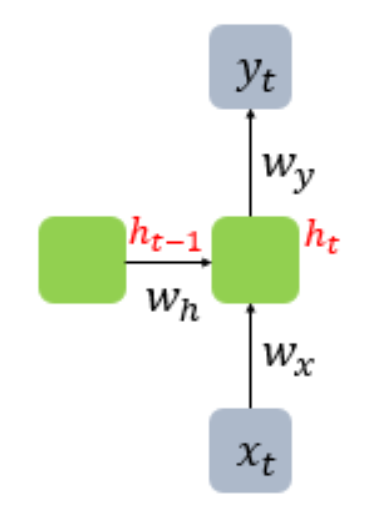

In [2]:
# 순환 신경망.
Image("/Users/gim-yuchan/Desktop/RNN.png", width = 150, height = 140)

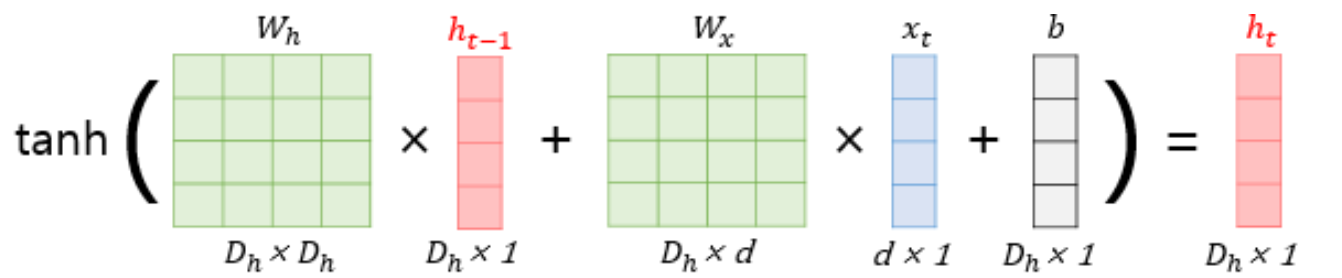

In [3]:
Image("/Users/gim-yuchan/Desktop/ht.png", width = 500, height = 400)

In [4]:
# 입력의 크기.
input_size  = 5

# 은닉 상태의 크기.
hidden_size = 8

# tensor 구성.(배치 크기 x 시점의 수 x 매 시점마다 들어가는 입력)
# (1, 10, 5)로 구성.
inputs = torch.Tensor(1, 10, 5)

# RNN 모델 셀 생성.
# batch_first : tensor의 첫번째 차원이 배치크기임을 나타내주기 위해서는 True값 설정.
cell = nn.RNN(input_size, hidden_size, batch_first = True)

# 모든 시점의 은닉 상태와 마지막 시점의 은닉 상태를 반환.
outputs, _status = cell(inputs)

# 결과 해석 : 10번의 시점동안 8차원의 은닉 상태가 출력되었다는 의미.
print(f'모든 time - step의 hidden state : {outputs.shape}')

# 마지막 시점의 은닉 상태.
# (층의 개수, 배치 크기, 은닉 상태의 크기)
print(f'최종 time - step의 hidden state : {_status.shape}')

모든 time - step의 hidden state : torch.Size([1, 10, 8])
최종 time - step의 hidden state : torch.Size([1, 1, 8])


### DRNN(Deep Recurrent Neural Network)

In [5]:
cell2 = nn.RNN(input_size, hidden_size, num_layers = 2, batch_first = True)
outputs2, _status2 = cell2(inputs)
print(f'모든 time - step의 hidden state : {outputs2.shape}')
print(f'최종 time - step의 hidden state : {_status2.shape}')

모든 time - step의 hidden state : torch.Size([1, 10, 8])
최종 time - step의 hidden state : torch.Size([2, 1, 8])


### BRNN(Bidirectional Recurrent Neural Network)
- 시점 t에에서의 출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측이 가능하다는 아이디어로부터 기반함.
- ex) 영어 빈칸 채우기 문제.
    - Exercise is very effective at [    ] belly fat.
    - 운동은 복부 지방을 [    ] 효과적이다.
        - 1. **reducing** 
        - 2. increasing
        - 3. multiplying
    - 문제 상황
        - 운동은 효과적이다 => 빈칸 이전에 나온 단어만으로의 유추는 어려움.
        - 따라서 이후 데이터로도 예측을 할 수 있는 양방향 RNN의 사용이 적합.
        
    - 하나의 출력값을 예측하기 위해 기본적으로 2개의 메모리 셀을 이용.
        - 1번째 메모리 셀 : 앞 시점의 은닉 상태(Forward States)
        - 2번째 메모리 셀 : 뒤 시점의 은닉 상태(Backward States)
    - BRNN도 다수의 은닉층을 가질 수 있음.
        - 딥러닝에서 은닉층 많다고 해서 모델의 성능이 반드시 좋아지는 것은 아님.
        - 학습할 수 있는 양이 많이지는 한편, 그 만큼 Train data도 많이 필요.

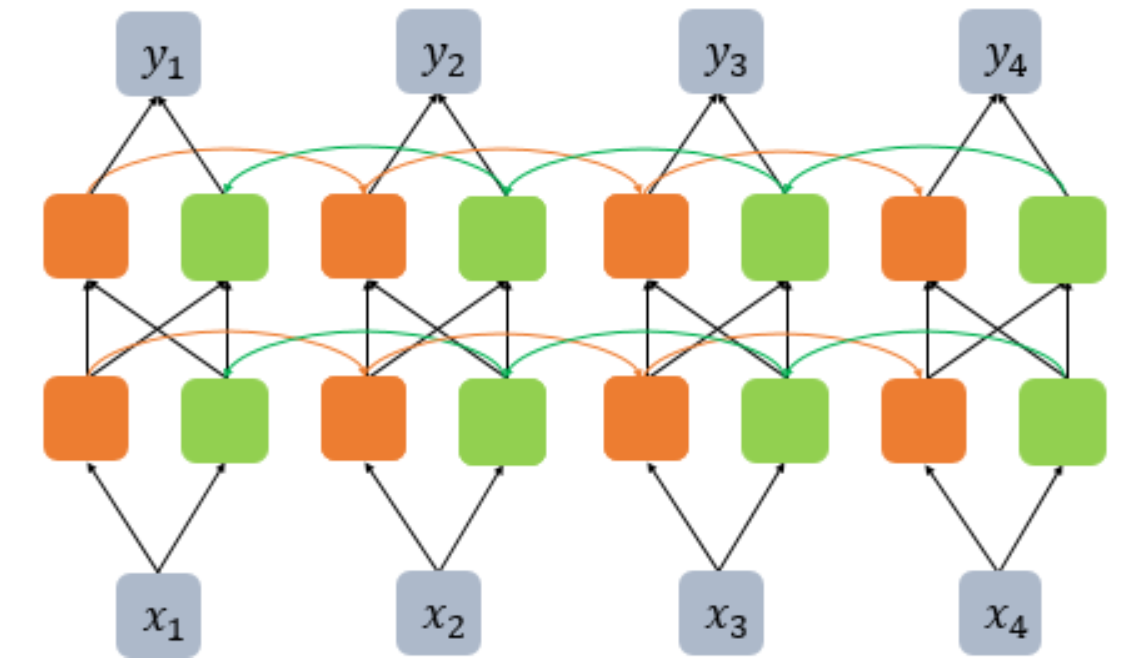

In [6]:
# 양방향 순환 신경망.
Image("/Users/gim-yuchan/Desktop/BRNN.png", width = 600, height = 600)

In [7]:
cell3 = nn.RNN(input_size, hidden_size, num_layers = 2, batch_first = True, bidirectional = True)
outputs3, _status3 = cell3(inputs)

# (배치 크기, 시퀀스 길이, 은닉 상태의 크기)
# 은닉 상태의 크기가 두 배가 되었음을 알 수 있음. : 양방향성을 가졌으므로
print(f'모든 time - step의 hidden state : {outputs3.shape}')

# 역방향 기준으로는 첫번째 시점에 해당되는 시점의 출력값을 충의 개수만큼 쌓아 올린 결과값.
print(f'최종 time - step의 hidden state : {_status3.shape}')

모든 time - step의 hidden state : torch.Size([1, 10, 16])
최종 time - step의 hidden state : torch.Size([4, 1, 8])


### LSTM(Long Short-Term Memory)
- Pytorch : nn.LSTM(input_dim, hidden_size, batch_first = True)
- Simple RNN의 한계를 극복하기 위한 RNN 변형 알고리즘 중 하나.
- 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것만을 저장.(cell state 추가)
- 전통적인 RNN의 한계를 극복하하여 비교적 긴 시퀀스 처리에 탁월한 성능을 보임.


#### 입력 게이트
- 현재 정보를 기억하기 위한 게이트.


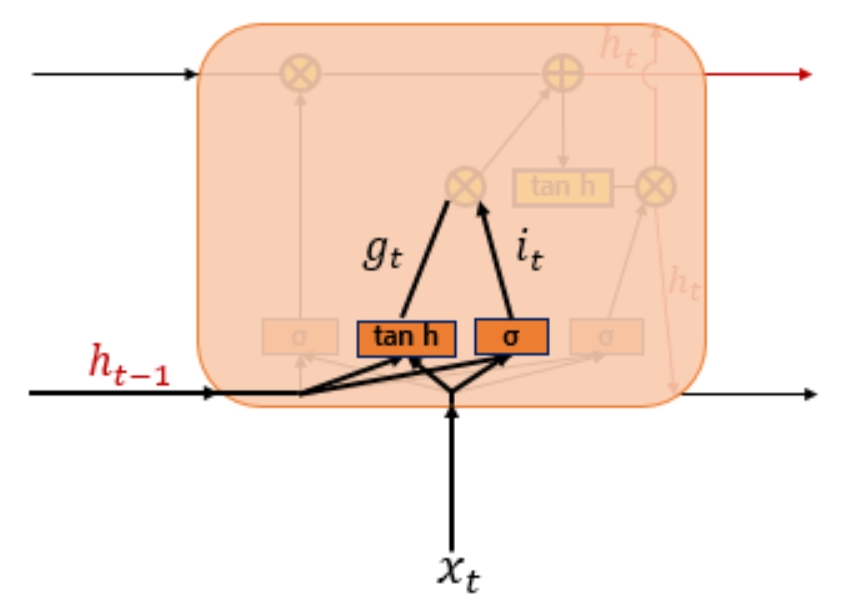

In [8]:
Image("/Users/gim-yuchan/Desktop/input gate.png", width = 250, height = 250)

#### 삭제 게이트

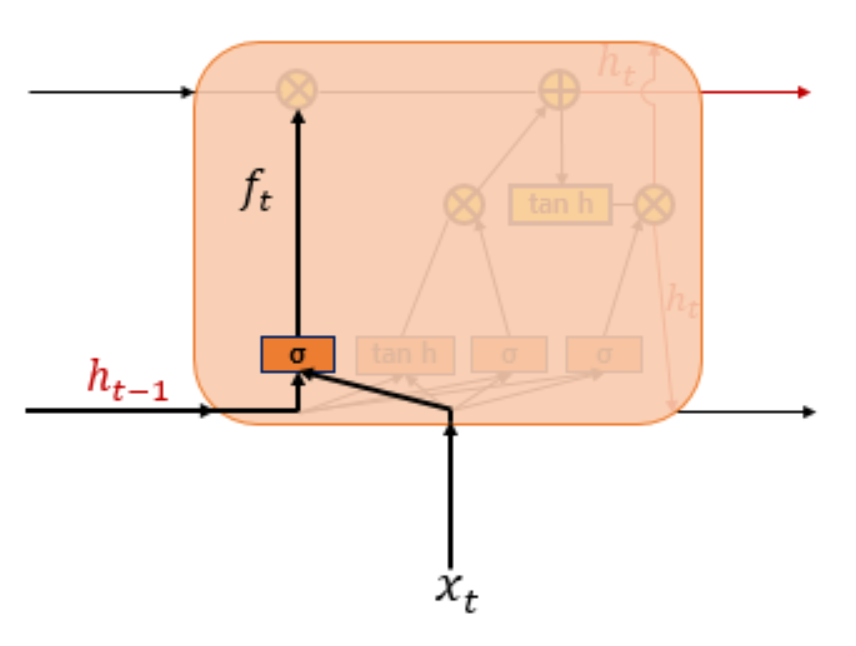

In [9]:
Image("/Users/gim-yuchan/Desktop/delete gate.png", width = 250, height = 250)

#### 셀 상태(장기 상태)

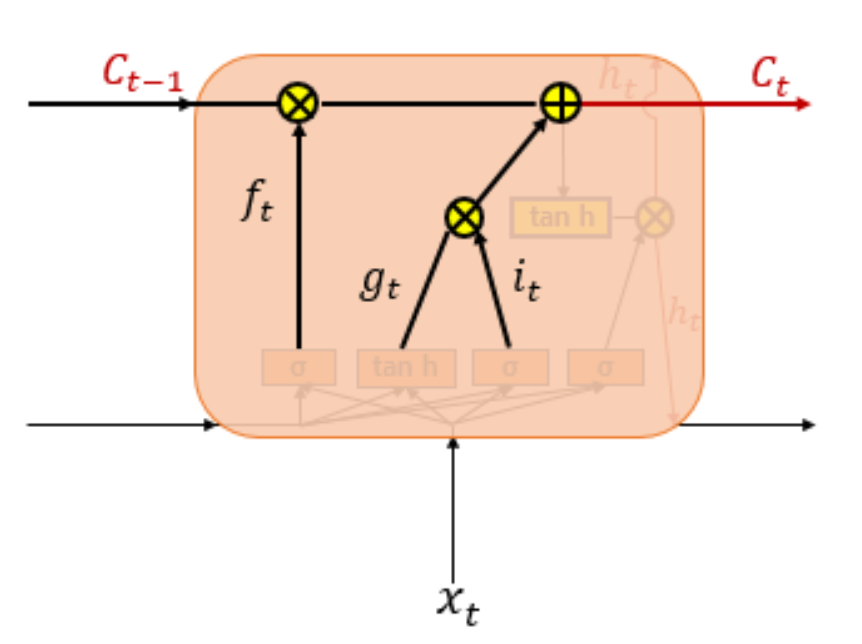

In [10]:
Image("/Users/gim-yuchan/Desktop/cell_state.png", width = 250, height = 250)

#### 출력 게이트와 은닉 상태(단기 상태)

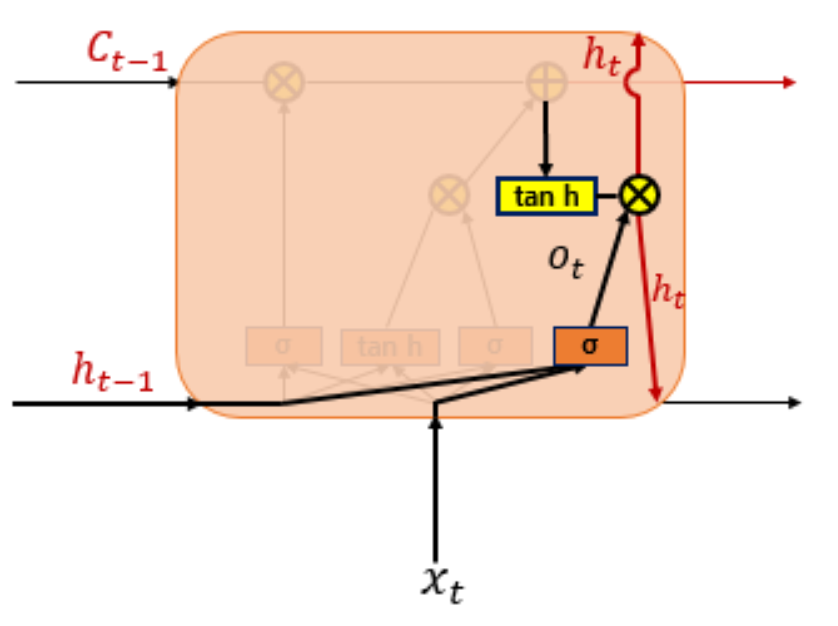

In [11]:
Image("/Users/gim-yuchan/Desktop/output_gate.png", width = 250, height = 250)

### Step1. Many-to-many RNN 
- 문자 단위 RNN(Char RNN)

In [12]:
# 두 문자열 생성.
input_str  = 'apple'
label_str  = 'pple!'

# 두 문자열을 합치고 중복을 제외하고 리스트(총 5개)로 반환.
char_vocab = sorted(list(set(input_str + label_str)))
vocab_size = len(char_vocab)
print(f'문자 집합의 크기 : {vocab_size}')
print('-'*40)


# RNN 딥러닝 구조 생성을 위한 기본 설정.
# 입력의 크기 = 문자 집합의 크기. 즉 문자 집합의 크기를 입력층의 수로 설정한다는 의미.
input_size    = vocab_size
hidden_size   = 5
output_size   = 5
learning_rate = 0.1


# 문자에 고유한 정수 인덱스 부여. => 고유한 값의 특성을 살리기 위해 딕셔너리 생성.
char_to_index = dict( (c, i) for i, c in enumerate(char_vocab) )
print(char_to_index)
print('-'*40)


# 후에 예측 결과를 다시 문자 시퀀스로 보기 위하여 반대로 정수로 부터 문자를 얻을 수 있는 딕셔너리 생성.  
index_to_char = {}
for key, value in char_to_index.items() :
    index_to_char[value] = key

print(index_to_char)
print('-'*40)


# 입력 데이터와 레이블 데이터의 각 문자들을 매핑 작업.
x_data = [ char_to_index[i] for i in input_str ]
y_data = [ char_to_index[i] for i in label_str ]
print(f' x_data : {x_data}')
print(f' y_data : {y_data}')
print('-'*40)


# pytorch nn.RNN()의 특성상 3차원의 tensor를 입력 받으므로, 배치 차원을 추가.
# torch.Tensor(y_data).unsqueeze(0)의 작업으로도 배치 차원 추가 가능.
x_data = [x_data]
y_data = [y_data]

# one-hot encoding.
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)
print('-'*40)


# 입력 데이터와 레이블 데이터를 tensor로 변경.
x = torch.FloatTensor(x_one_hot)
y = torch.LongTensor(y_data)
print(f'훈련 데이터 크기 : {x.shape}')
print(f'레이블의 크기 : {y.shape}')
print('-'*40)

# Modeling.
class Net(torch.nn.Module) :
    def __init__(self, input_size, hidden_size, output_size) :
        # 부모클래스의 __init__ 메소드 호출.
        super(Net, self).__init__()
        # RNN cell 구현.
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first = True)
        # RNN 출력층 구현.
        self.fc = torch.nn.Linear(hidden_size, output_size, bias = True)
        
        
    # 구현한 RNN 셀과 출력층을 연결.
    def forward(self, x) :
        x, _status = self.rnn(x)
        # fc : 완전 연결층(fully - connected layer)
        x = self.fc(x)
        return x
    
    
# class로 정의한 모델 저장.
net = Net(input_size, hidden_size, output_size)
outputs = net(x)

# 3차원 tensor.(dim, timesteps, output_size)
print(outputs.shape)
print('-'*40)

# Loss 정의.
criterion = torch.nn.CrossEntropyLoss()
# optimizer : adam으로 설정.
optimizer = optim.Adam(net.parameters(), learning_rate)

for i in range(100) :
    # 매 epoch마다 Gradient 0으로 초기화.
    optimizer.zero_grad()
    outputs = net(x)
    
    # batch 차원 제거를 위해 view() 수행.
    loss = criterion(outputs.view(-1, input_size), y.view(-1))
    
    # 기울기 계산.
    loss.backward()
    
    # 아까 optimizer 선언시 넣어둔 파라미터 업데이트.
    optimizer.step()
    
    # 아래 3줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 code.
    # 최종 예측값인 각 time-step별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택.
    result = outputs.data.numpy().argmax(axis = 2)
    result_str = ''.join([ index_to_char[j] for j in np.squeeze(result) ])
    print(f'epoch : {i} loss : {loss.item()}, prediction : {result} true y : {y_data} prediction str : {result_str}')

문자 집합의 크기 : 5
----------------------------------------
{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}
----------------------------------------
{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}
----------------------------------------
 x_data : [1, 4, 4, 3, 2]
 y_data : [4, 4, 3, 2, 0]
----------------------------------------
[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]
----------------------------------------
훈련 데이터 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])
----------------------------------------
torch.Size([1, 5, 5])
----------------------------------------
epoch : 0 loss : 1.7288296222686768, prediction : [[0 0 0 0 0]] true y : [[4, 4, 3, 2, 0]] prediction str : !!!!!
epoch : 1 loss : 1.4783012866973877, prediction : [[3 3 3 3 3]] true y : [[4, 4, 3, 2, 0]] prediction str : lllll
epoch : 2 loss : 1.3112709522247314, prediction : [[4 3 3 2 2]] true y : [[4, 4, 3, 2, 0]] prediction st

epoch : 67 loss : 0.000844344322104007, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 68 loss : 0.000834888662211597, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 69 loss : 0.0008258615853264928, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 70 loss : 0.0008172155357897282, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 71 loss : 0.0008088551694527268, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 72 loss : 0.000800828100182116, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 73 loss : 0.0007930630818009377, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 74 loss : 0.0007855360163375735, prediction : [[4 4 3 2 0]] true y : [[4, 4, 3, 2, 0]] prediction str : pple!
epoch : 75 loss : 0.0007782948086969554, prediction : [[4 4

### Step2. 문자 단위 RNN(Char RNN)
- 더 많은 데이터를 이용한 경우.

In [13]:
text = ("if you want to build a ship, don't drum up people together to "
        "collect wood and don't assign them tasks and work, but rather "
        "teach them to long for the endless immensity of the sea.")

# 훈련 데이터 전처리.
# 중복 제거 작업.
char_set = list(set(text))

# 각 문자에 정수 인코딩 작업.
char_dic = {c : i for i, c in enumerate(char_set)}
# print(char_dic)
# print(f'문자 집합의 크기 : {len(char_dic)}')

# 하이퍼 파라미터 설정.
hidden_size     = len(char_dic)

# 시퀀스 길이 값을 10의 단위로 자름.
sequence_length = 10  
learning_rate   = 0.1

# 데이터 구성.
x_data, y_data = [], []

for i in range(len(text) - sequence_length) :
    x_str = text[i : i + sequence_length]
    y_str = text[i + 1 : i + sequence_length + 1]
    # print('iter :', i, x_str, '=>', y_str )
    
    # x str, y_str to index. 고유한 정수값으로 인코딩 작업.
    x_data.append([char_dic[i] for i in x_str])
    y_data.append([char_dic[i] for i in y_str])

    
# one-hot encoding.
x_one_hot = [ np.eye(len(char_dic))[i] for i in x_data ]
x = torch.FloatTensor(x_one_hot)
y = torch.LongTensor(y_data)


# Modeling.
class Net2(torch.nn.Module) :
    def __init__(self, input_dim, hidden_dim, layers) :
        # 부모클래스의 __init__ 메소드 호출.
        super(Net2, self).__init__()
        # RNN cell 구현.
        # num_layers : 몇개의 hidden layer를 쌓을 것인가에 대한 인자.
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
        # RNN 출력층 구현.
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias = True)
        
        
    # 구현한 RNN 셀과 출력층을 연결.
    def forward(self, x) :
        x, _status = self.rnn(x)
        # fc : 완전 연결층(fully - connected layer)
        x = self.fc(x)
        return x
    
    
# 2개의 층을 쌓음.
net2 = Net2(len(char_dic), hidden_size, 2)
# print(net2(x).shape)

# 앞서 설정한 optimizer, loss를 그대로 이용.
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), learning_rate)

for i in range(100) :
    # 매 epoch마다 Gradient 0으로 초기화.
    optimizer.zero_grad()
    
    # 특정 크기를 가진 tensor를 매 epoch마다 모델의 입력으로 사용.
    outputs = net2(x)
    
    # batch 차원 제거를 위해 view() 수행.
    loss = criterion(outputs.view(-1, len(char_dic)), y.view(-1))
    
    # 기울기 계산.
    loss.backward()
    
    # 아까 optimizer 선언시 넣어둔 파라미터 업데이트.
    optimizer.step()
    
    results = outputs.argmax(dim = 2)
    predict_str = ''
    for i, r in enumerate(results) :
        # 처음이면 모든 예측 결과를 가져오기.
        if i == 0: 
            predict_str += ''.join( [char_set[j] for j in r] )
        
        # 그 다음부터는 마지막 글자만 반복하여 추가.
        else: 
            predict_str += char_set[r[-1]]
    

    print(predict_str)
    print()

rrrrbarraabrrbrbaabrraraarbrrrbaabrraabrarrrrrbrrrrbbrrarrprbrrbbrrrbrrbbbraarrrbbabraabbbrrrarbrraabbraarrrrbbrrraarraaarrprrabarrarbrrbrrbabrrabbrarrrrrrrrbrrabbrarbrrbbrrarrabr

hh wh sws wwwshw  w wwhwswn n n s o s  hwswhhohwhhw hhhs onws o wwwwwhws n w  wws s o w wwhsww ohws s hwh wws s n,s o s s ohws owhwswohwsho hsho  nws owo wwwshws w s wwwh hws owhw

          e d t       e e e e e e e e e e d  e e e       e o    e    e e e e    e e e e        e d    n e e   e n e e e e e d    e e e   t  e    e    e e e       e e e d e  e e e 

tilpsltslteee teetetla sleaoee tetattte t lesle ateettt aesaettaeetla lttateeteotteeettte teoetetatt atetsle letae lt laetatoet ateesatllttatetlatat ttae e leteeeeteteete ettttett

toto  t to o t otoo oo to   toto tottottoto    too    tt  tottto   ootootoo o o ttt o    to o  o ototo   to to  oo ottoot oto  to   to o  t   to toot toottto  ooo oo o ot totoooot

oo oe  eroud uto    o u  e  u u e d    u ed u eu  e  e e e  u    ero uo uo    d   u o r  u  d  

p eou want to luild a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the ssak

p eou want to build a ship, don't arum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the seak

l eou want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them ta long for the endless immensity of the seak

p eou want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the seak

p eou want to build a ship, don't drum up people together to collect wood and don't assign them tosks and work, but rather teach them to long for the endless immensity of the seak

g eou want to build a ship, don't drum up people together to collect wood and don't assign them

### Step3. 단어 단위 RNN
- Embedding 이용.

In [14]:
text = 'Repeat is the best medicine for memory'
vocab = list(set(text.split()))
# print(vocab)

# 단어에 고유한 값 설정.
# unk : 모르는 단어를 의미하는 토큰.
# word_index : 단어장의 개념이라고 생각하면 좋음.
word_index = {k : i for i, k in enumerate(vocab, 1)}
word_index['<unk>'] = 0
# print(word_index)


# 예측한 수치화 데이터를 다시 단어로 바꾸기 위한 딕셔너리 생성.
index_word = {v : j for j, v in word_index.items()}

# 데이터의 단어를 정수로 인코딩 및 입력 데이터 및 레이블 데이터 생성 함수.
def build_data(text, word_index) :
    # 각 문자를 정수로 변환.
    # text : 각 문자를 담고있는 리스트.
    encoded = [ word_index[token] for token in text ]
    
    # 입력 시퀀스와 레이블 시퀀스를 분리.
    x_data, y_data = encoded[:-1], encoded[1:]
    
    # 배치 차원 추가.
    x_data = torch.LongTensor(x_data).unsqueeze(0)
    y_data = torch.LongTensor(y_data).unsqueeze(0)
    return x_data, y_data

x, y = build_data(text.split(),  word_index)
# print(x, y)


# Set hyperparmeter.
# 단어장 크기 : 임베딩층, 출력층에 이용.
vocab_size  = len(word_index)

# 임베딩된 차원의 크기 및 RNN 층 입력 차원의 크기.
input_size  = 5

# RNN 은닉층의 크기.
hidden_size = 20


# Modeling.
class Net3(nn.Module) :
    def __init__(self, vocab_size, input_size, hidden_size, batch_first = True) :
        super(Net3, self).__init__()
        #  word embedding.
        self.embeddin_layer = nn.Embedding(num_embeddings = vocab_size, embedding_dim = input_size)
        
        # 입력 차원, 은닉 상태의 크기 정의.
        self.rnn_layer = nn.RNN(input_size, hidden_size, batch_first = True)
        
        # 출력은 one-hot vector size = 단어 집합의 크기.
        self.linear = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x) :
        # 1. embedding layer.
        # 크기 변화 : (배치 크기, 시퀀스 길이) => (배치 크기, 시퀀스 길이, 임베딩 차원)
        output = self.embeddin_layer(x)
        
        # 2. RNN layer.
        # 크기 변화 : (배치 크기, 시퀀스 길이, 임베딩 차원)
        # => output (배치 크기, 시퀀스 길이, 은닉층 크기), hidden (1, 배치 크기, 은닉층 크기)
        output, hidden = self.rnn_layer(output)
        
        # 3. output layer.
        # 크기 변화 : (배치 크기, 시퀀스 길이, 은닉층 크기) => (배치 크기, 시퀀스 길이, 단어장 크기)
        output = self.linear(output)
            
        # 4. view를 통해서 배치 차원 제거.
        # 크기 변화 : (배치 크기, 시퀀스 길이, 단어장 크기) => (배치 크기 * 시퀀스 길이, 단어장 크기)
        return output.view(-1, output.size(2))
    

model     = Net3(vocab_size, input_size, hidden_size, batch_first = True)
loss_ft   = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters())


# decoding.
# 수치화된 데이터를 단어로 전환하는 함수.
decode = lambda y : [ index_word.get(x) for x in y ]

# 학습 시작.
for epoch in range(300) :
    optimizer.zero_grad()
    output = model(x)
    loss = loss_ft(output, y.view(-1))
    loss.backward()
    optimizer.step()
    
    # 20번에 한번씩 출력.
    if epoch % 20 == 0 :
        print(f'[{epoch + 1} / 200] {loss}')
        pred = output.softmax(-1).argmax(-1).tolist()
        print(' '.join( ['Repeat'] + decode(pred) ))
        print()

[1 / 200] 2.1368179321289062
Repeat Repeat best best for is Repeat

[21 / 200] 1.85383939743042
Repeat best best best for is memory

[41 / 200] 1.5881434679031372
Repeat the best best medicine for memory

[61 / 200] 1.3074839115142822
Repeat the best best medicine for memory

[81 / 200] 1.0152784585952759
Repeat is the best medicine for memory

[101 / 200] 0.7457060217857361
Repeat is the best medicine for memory

[121 / 200] 0.530599057674408
Repeat is the best medicine for memory

[141 / 200] 0.3779846727848053
Repeat is the best medicine for memory

[161 / 200] 0.27354559302330017
Repeat is the best medicine for memory

[181 / 200] 0.20191584527492523
Repeat is the best medicine for memory

[201 / 200] 0.15268485248088837
Repeat is the best medicine for memory

[221 / 200] 0.11872158199548721
Repeat is the best medicine for memory

[241 / 200] 0.0949404165148735
Repeat is the best medicine for memory

[261 / 200] 0.07786576449871063
Repeat is the best medicine for memory

[281 / 200